In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d import Axes3D
from numpy import sin
%matplotlib inline

In [2]:
def create_cmap(color1, color2, color3):
    colors = [color1, color2, color3]
    cmap_name = 'list'
    n_bins = 100
    cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)
    return cmap

def build_hankel(data, rows, cols):
    X = np.empty((rows, cols))
    for k in range(rows):
        X[k, :] = data[k:cols + k]
    return X 

def HAVOK(X, dt, r, norm, center=False, return_uv=False):
    if (center): 
        m = X.shape[0]
        X̄ = X - X[m//2,:]
        U, Σ, Vh = np.linalg.svd(X̄,full_matrices=False)
    else:
        U, Σ, Vh = np.linalg.svd(X,full_matrices=False)
    V = Vh.T
    polys = true_polys(X.shape[0], dt, r, center)
    for _i in range(r):
        if (np.dot(U[:,_i], polys[:,_i]) < 0):
            U[:,_i] *= -1
            V[:,_i] *= -1
    V1 = V[:-1,:r]
    V2 = V[1:,:r]
    A = (V2.T @ np.linalg.pinv(V1.T) - np.eye(r)) / (norm * dt)
    if (return_uv): 
        return A, U, V
    return A

def true_polys(rows, dt, r, center): 
    m = rows // 2
    Ut = np.linspace(-m*dt, m*dt, rows)
    poly_stack = []
    for j in range(r):
        if (center):
            poly_stack.append(Ut ** (j + 1))
        else: 
            poly_stack.append(Ut ** j)
    poly_stack = np.vstack(poly_stack).T
    Q = np.empty((rows, r)) # Perform Gram-Schmidt
    for j in range(r): 
        v = poly_stack[:, j]
        for k in range(j - 1): 
            r_jk = Q[:, k].T @ poly_stack[:, j]
            v -= (r_jk * Q[:, k])
        r_jj = np.linalg.norm(v)
        Q[:, j] = v / r_jj
    return Q

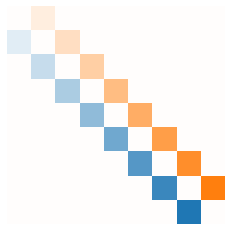

In [3]:
# Linear dynamics
np.random.seed(4)
plt.figure()
vals = np.array([1, 2, 3, 4, 5, 6, 7, 8])
plt.imshow(np.diag(vals,1) + np.diag(-vals,-1), cmap=create_cmap('tab:blue','white','tab:orange'))
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.savefig('pdf_files/fig1a.pdf', bbox_inches='tight')

In [4]:
# Apply HAVOK to time series x(t) = sin(t) + sin(2t)
ϵ = 10
t = np.linspace(0, ϵ, 10001)
dt = t[1] - t[0]
rows = 41
cols = t.size - rows + 1
X = build_hankel(sin(t) + sin(2 * t), rows, cols)  
A, U, V = HAVOK(X, dt, 4, 1, center=True, return_uv=True)

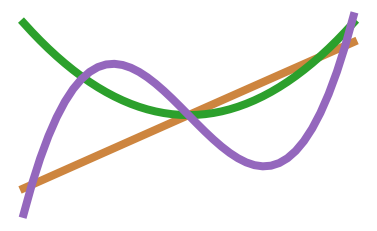

In [5]:
# Plot the Orthogonal Polynomials and the Frenet Serret Frame
plt.figure(figsize=(6.5,4))

# Orthogonal Polynomials 
#plt.subplot(2, 1, 1)
#plt.title('Orthogonal Polynomials', fontsize=16)
colors = ['peru','tab:green','tab:purple','darkcyan']
labels = [r'$p_1$',r'$p_2$',r'$p_3$',r'$p_4$']
for i in range(3):
    plt.plot(U[:,i], colors[i], label=labels[i], linewidth=8)
#plt.legend(bbox_to_anchor=(1.02, 1.0), loc='upper left', fontsize=14)
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.savefig('pdf_files/fig1b.pdf',bbox_inches = "tight")